# Mounting the google drive

In [1]:
# Mounting the google drive to get the images

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing useful libraries and data reading

In [2]:
# Importing useful libraries

import numpy as np # For numerical computations
import pandas as pd # For dataframe related tasks

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To remove unneccesary warnings
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor # For model training
from sklearn.model_selection import train_test_split # Fro train test splitting
from sklearn import metrics # For model evaluation

import pickle # For model saving

In [3]:
# Specifying the location for all our data is located

data_folder_path = 'drive/MyDrive/AI_project_data/'

In [6]:
# Reading the data

df = pd.read_csv(data_folder_path + 'sales_data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data cleaning and visualization

In [7]:
# Lets see the shape of our dataset

df.shape

(8523, 12)

In [8]:
# Lets see which columns are non-numerical

categorical_cols = []
for column in list(df.columns):
  if df[column].dtype == 'O':
    categorical_cols.append(column)
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
# Lets see for missing values

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# Filling the missing values of the weight with the mean

df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [18]:
# Lets see the mode of the outlet size

df['Outlet_Size'].mode()

0    Medium
dtype: object

In [19]:
# Lets try to view each mode for each outlet size of the same outlet type

new_df = df.pivot_table(values= 'Outlet_Size',columns='Outlet_Type',
                        aggfunc = (lambda x: x.mode()[0]))
new_df

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [37]:
# Filling all the null values with their corresponding modes

null_indices = list(df[df['Outlet_Size'].isna()].index)
for index in null_indices:
  if df.loc[index]['Outlet_Type'] == 'Grocery Store' or df.loc[index]['Outlet_Type'] == 'Supermarket Type1':
    df.loc[index,'Outlet_Size'] = 'Small'
  
  else:
    df.loc[index,'Outlet_Size'] = 'Medium'

In [42]:
# Lets see if all the null values are gone now

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

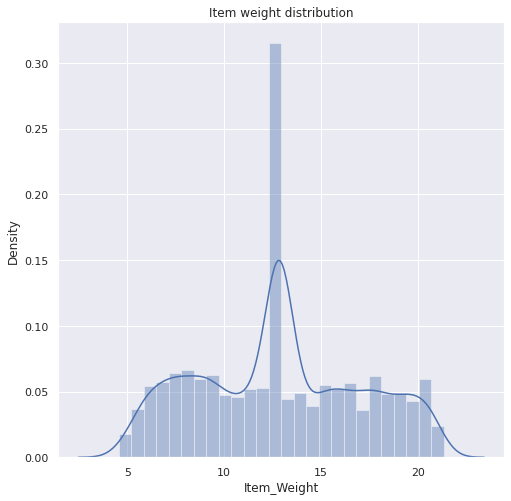

In [44]:
# Lets see the item weight distribution using plot

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df['Item_Weight'])
plt.title('Item weight distribution')
plt.show()

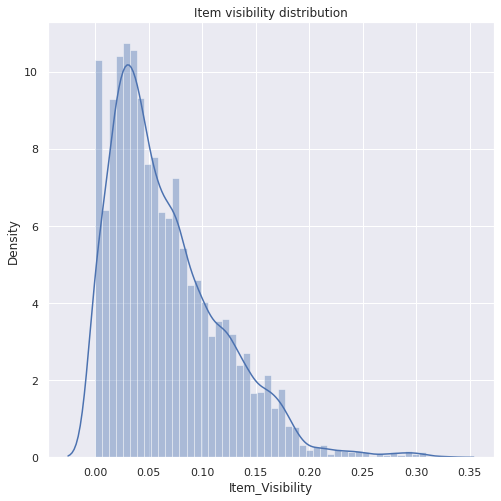

In [46]:
# Lets see the item visibility distribution using plot

plt.figure(figsize=(8,8))
sns.distplot(df['Item_Visibility'])
plt.title('Item visibility distribution')
plt.show()

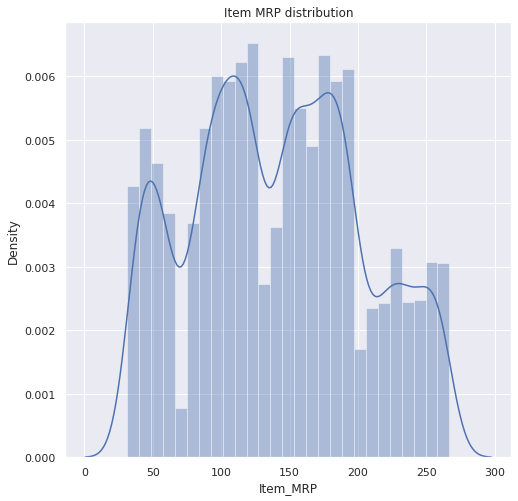

In [47]:
# Lets see the item MRP distribution using plot

plt.figure(figsize=(8,8))
sns.distplot(df['Item_MRP'])
plt.title('Item MRP distribution')
plt.show()

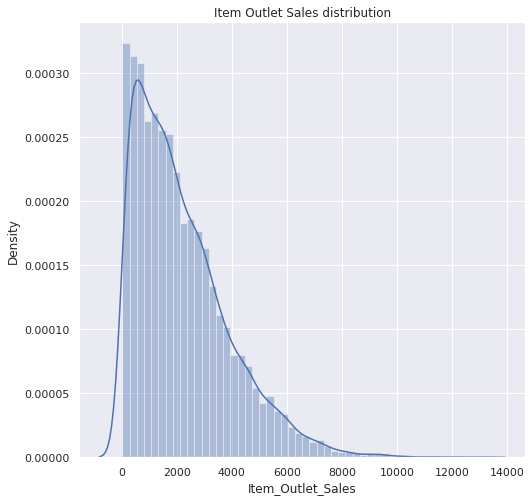

In [48]:
# Lets see the item Outlet_Sales distribution using plot

plt.figure(figsize=(8,8))
sns.distplot(df['Item_Outlet_Sales'])
plt.title('Item Outlet Sales distribution')
plt.show()

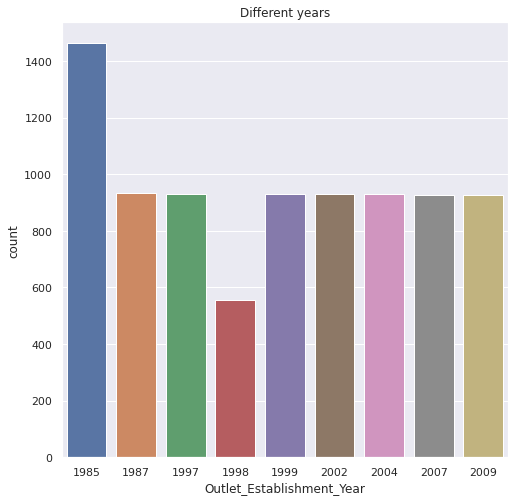

In [50]:
# Lets see the number of years using plot

plt.figure(figsize=(8,8))
sns.countplot(data = df, x = 'Outlet_Establishment_Year')
plt.title('Different years')
plt.show()

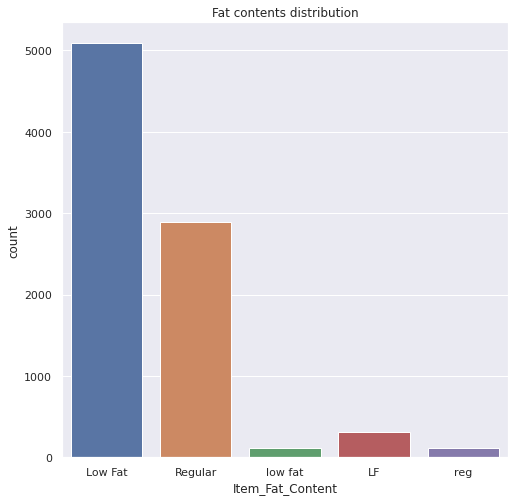

In [51]:
# Lets see the number of item fat counts using plot

plt.figure(figsize=(8,8))
sns.countplot(data = df, x = 'Item_Fat_Content')
plt.title('Fat contents distribution')
plt.show()

From the above we can see that low fat and LF are the same and also Regular and reg are the same so lets fix that issue

In [54]:
# Changing all the values into REG and LF only

df['Item_Fat_Content'] = df['Item_Fat_Content']\
                      .apply(lambda x: 'LF' if x == 'Low Fat' or x == 'low fat'\
                              or x == 'LF' else 'REG')

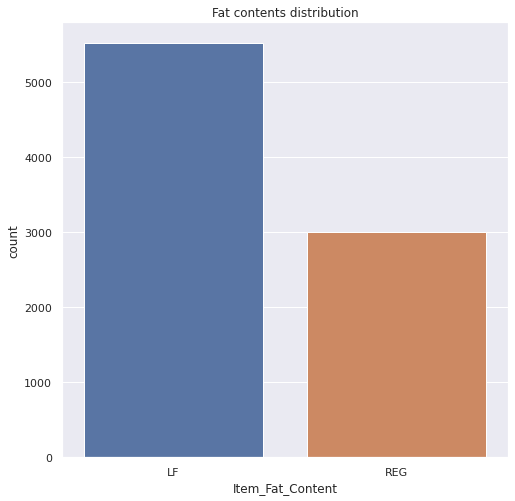

In [55]:
# Lets see the number of item fat counts using plot

plt.figure(figsize=(8,8))
sns.countplot(data = df, x = 'Item_Fat_Content')
plt.title('Fat contents distribution')
plt.show()

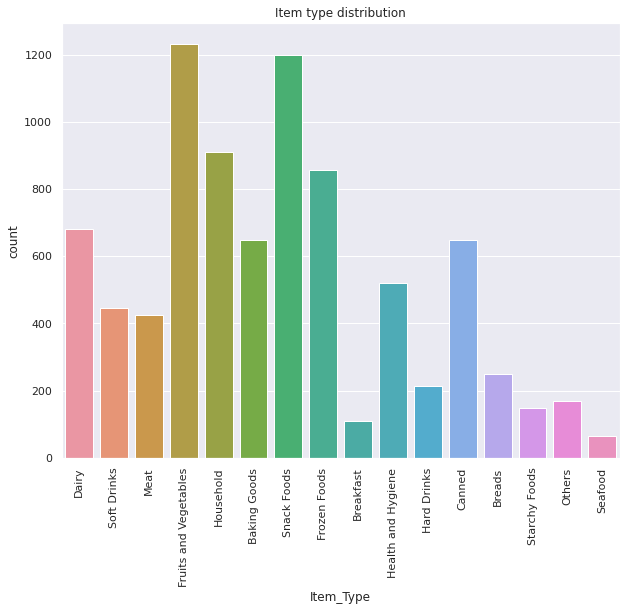

In [62]:
# Lets see the number of item type counts using plot

plt.figure(figsize=(10,8))
chart = sns.countplot(data = df, x = 'Item_Type')
plt.title('Item type distribution')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

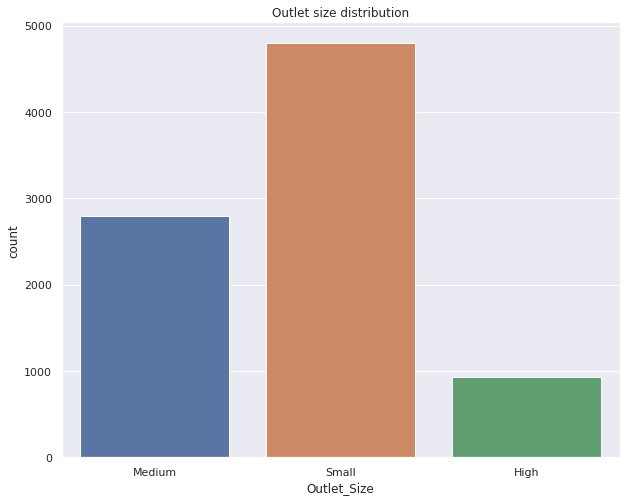

In [66]:
# Lets see the number of outlet size counts using plot

plt.figure(figsize=(10,8))
sns.countplot(data = df, x = 'Outlet_Size')
plt.title('Outlet size distribution')
plt.show()

# Data preprocessing

In [68]:
# Encoding to change all the categorical columns into numerical

for col in categorical_cols:
  categories = list(df[col].value_counts().index)
  for i,category in enumerate(categories):
    df[col] = df[col].apply(lambda x:i if x == category else x)

In [70]:
# Lets see if all the categorical columns are succesfully converted into numerical

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,118,9.30,0,0.016047,4,249.8092,2,1999,1,2,0,3735.1380
1,573,5.92,1,0.019278,8,48.2692,6,2009,1,0,3,443.4228
2,239,17.50,0,0.016760,9,141.6180,2,1999,1,2,0,2097.2700
3,725,19.20,1,0.000000,0,182.0950,8,1998,0,0,1,732.3800
4,734,8.93,0,0.000000,2,53.8614,1,1987,2,0,0,994.7052


In [71]:
# Now that we have all numerical columns let take the feature and target 

X = df.drop(columns = 'Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [72]:
# After getting the feature and targets now lets do the train test splition

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=1
                                                 )

# Model training

In [73]:
# Instatiating the regressor

xg = XGBRegressor()

In [75]:
# Fitting and training the model

xg.fit(X_train,y_train)

[07:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# Model evaluation

In [76]:
# Lets see the training set accuracy

pred = xg.predict(X_train)
r2_score = metrics.r2_score(y_train,pred)
r2_score

0.6349888297132915

In [77]:
# Lets see the test set accuracy

pred = xg.predict(X_test)
r2_score = metrics.r2_score(y_test,pred)
r2_score

0.6005992543004413

# Saving the model

In [79]:
# Saving the model 

file_name = 'models/sales_prediction.h5'
with open(file_name,'wb') as f:
  pickle.dump(xg,f)